In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import stats
import pandas as pd
import pickle
import copy
from pathlib import Path
import sys
import os
import csv

%matplotlib inline

In [2]:
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/'# basepath

#path = os.path.join(basepath,'actual_agency')
path = os.path.join(basepath,'actual_agency') #actualagency
print(path)
sys.path.append(path)

from pyanimats import *
from pyTPM import *
import actual_agency as agency

path = os.path.join('/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/envs/pyphikit/lib/python3.6/site-packages/pyphi') #pyphi
print(path)
sys.path.append(path)

import pyphi
from pyphi import actual, config, Direction

/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/actual_agency
/home/kyoko/.anyenv/envs/pyenv/versions/anaconda3-5.1.0/envs/pyphikit/lib/python3.6/site-packages/pyphi


In [3]:
%load_ext autoreload
%autoreload 2
%aimport pyTPM, pyanimats, actual_agency

# Lets inspect the fitness of the animats

In [4]:
# First, tell the computer where to look for files
basepath = '/home/kyoko/デスクトップ/Develop/ActualCausation/MABE/MABE_contents/Experiments/'#bathpath of MABE


In [5]:
# Get Line-of-descent (LOD) data from MABE output
path = os.path.join(basepath,'190822_7_15_63_31_h2') # number of hidden nodes : 2
with open(os.path.join(path,'190822_7156331_h2_LOD_data.pkl'),'rb') as f:
    LOD_data_2 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h3') # number of hidden nodes : 3
with open(os.path.join(path,'190822_7156331_h3_LOD_data.pkl'),'rb') as f:
    LOD_data_3 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h4') # number of hidden nodes : 4
with open(os.path.join(path,'190822_7156331_h4_LOD_data.pkl'),'rb') as f:
    LOD_data_4 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h5') # number of hidden nodes : 5
with open(os.path.join(path,'190822_7156331_h5_LOD_data.pkl'),'rb') as f:
    LOD_data_5 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h6') # number of hidden nodes : 6
with open(os.path.join(path,'190822_7156331_h6_LOD_data.pkl'),'rb') as f:
    LOD_data_6 = pickle.load(f)

In [6]:
# add fitness to the LOD data structure
n_runs = 10

for n in range(n_runs):
    LOD_data_2[n]['fitness'] = (LOD_data_2[n]['correct_AVE']
                               /(LOD_data_2[n]['correct_AVE']+LOD_data_2[n]['incorrect_AVE']))
for n in range(n_runs):
    LOD_data_3[n]['fitness'] = (LOD_data_3[n]['correct_AVE']
                               /(LOD_data_3[n]['correct_AVE']+LOD_data_3[n]['incorrect_AVE']))
for n in range(n_runs):
    LOD_data_4[n]['fitness'] = (LOD_data_4[n]['correct_AVE']
                               /(LOD_data_4[n]['correct_AVE']+LOD_data_4[n]['incorrect_AVE']))
for n in range(n_runs):
    LOD_data_5[n]['fitness'] = (LOD_data_5[n]['correct_AVE']
                               /(LOD_data_5[n]['correct_AVE']+LOD_data_5[n]['incorrect_AVE']))
for n in range(n_runs):
    LOD_data_6[n]['fitness'] = (LOD_data_6[n]['correct_AVE']
                               /(LOD_data_6[n]['correct_AVE']+LOD_data_6[n]['incorrect_AVE']))


In [7]:
LOD_data_4[0]

,update,timeToCoalescence,ID,Simple_numOffspring,alive,correct_AVE,correct_LIST,countCopy,countDelete,countIndel,...,incorrect_LIST,markovBrainDeterministicGates,markovBrainGates,markovBrain_nextNodesConnections_LIST,markovBrain_nodesConnections_LIST,optimizeValue,score_AVE,score_LIST,timeOfBirth,fitness
0,0,0,91,1,1,66.0,66,0,0,0,...,62,3,3,"0,1,2,0,1,1,1,1,1,1","0,3,1,0,2,0,0,1,0,1",1.215506,1.215506,1.215506,-1,0.515625
1,500,0,50058,1,1,68.0,68,48,34,0,...,60,2,2,"1,0,0,0,0,1,1,1,0,1","0,1,1,0,1,0,0,1,0,0",1.477455,1.477455,1.477455,499,0.531250
2,1000,0,100029,7,1,88.0,88,116,109,0,...,40,7,7,"3,5,2,1,2,5,0,3,2,4","1,2,5,0,0,1,1,1,9,1",10.401270,10.401270,10.401270,999,0.687500
3,1500,0,150075,1,1,90.0,90,199,182,0,...,38,9,9,"6,3,5,4,2,4,4,3,2,2","2,3,5,3,2,3,0,4,6,1",12.642808,12.642808,12.642808,1499,0.703125
4,2000,0,200088,1,1,90.0,90,332,309,0,...,38,7,7,"2,2,2,0,1,4,2,4,3,4","3,3,3,1,1,0,0,2,6,2",12.642808,12.642808,12.642808,1999,0.703125
5,2500,0,250057,1,1,108.0,108,481,465,0,...,20,7,7,"1,0,4,1,1,2,1,5,4,2","2,3,2,1,3,2,1,2,5,1",73.224821,73.224821,73.224821,2499,0.843750
6,3000,0,300049,1,1,112.0,112,608,594,0,...,16,7,7,"1,0,1,1,1,4,1,1,2,3","2,5,1,0,1,0,3,2,3,1",108.186410,108.186410,108.186410,2999,0.875000
7,3500,0,350052,2,1,112.0,112,726,720,0,...,16,5,5,"0,1,1,1,2,2,1,1,2,3","2,3,1,0,1,0,1,1,4,1",108.186410,108.186410,108.186410,3499,0.875000
8,4000,0,400014,2,1,112.0,112,850,849,0,...,16,5,5,"1,1,0,0,1,2,1,1,2,3","2,3,1,0,1,0,1,1,4,2",108.186410,108.186410,108.186410,3999,0.875000
9,4500,0,450096,3,1,112.0,112,944,961,0,...,16,6,6,"1,0,0,1,1,3,1,1,3,4","1,3,3,0,2,0,1,1,3,2",108.186410,108.186410,108.186410,4499,0.875000


In [8]:
# inspect the LOD data for a specific LOD (run)
run = 1
LOD_data_2[run]

,update,timeToCoalescence,ID,Simple_numOffspring,alive,correct_AVE,correct_LIST,countCopy,countDelete,countIndel,...,incorrect_LIST,markovBrainDeterministicGates,markovBrainGates,markovBrain_nextNodesConnections_LIST,markovBrain_nodesConnections_LIST,optimizeValue,score_AVE,score_LIST,timeOfBirth,fitness
0,0,0,10,2,1,64.0,64,0,0,0,...,64,2,2,"1,2,0,0,1,0,0,1","0,0,0,1,1,2,1,1",1.000000,1.000000,1.000000,-1,0.500000
1,500,0,50056,2,1,71.0,71,40,43,0,...,57,1,1,"0,0,1,0,1,0,0,1","1,1,0,1,0,0,0,1",1.979932,1.979932,1.979932,499,0.554688
2,1000,0,100060,1,1,71.0,71,59,60,0,...,57,1,1,"1,0,0,0,1,0,0,1","1,1,0,1,0,0,0,1",1.979932,1.979932,1.979932,999,0.554688
3,1500,0,150022,3,1,71.0,71,86,88,0,...,57,1,1,"1,0,1,0,1,0,0,1","1,1,0,0,1,0,0,1",1.979932,1.979932,1.979932,1499,0.554688
4,2000,0,200020,2,1,82.0,82,150,145,0,...,46,2,2,"0,0,1,1,2,1,1,2","2,2,0,0,2,0,0,2",5.791816,5.791816,5.791816,1999,0.640625
5,2500,0,250022,2,1,90.0,90,244,229,0,...,38,2,2,"1,0,2,0,1,1,0,1","2,2,0,0,2,0,0,2",12.642808,12.642808,12.642808,2499,0.703125
6,3000,0,300027,1,1,90.0,90,346,322,0,...,38,2,2,"1,0,0,0,1,1,2,1","2,2,1,0,1,0,0,2",12.642808,12.642808,12.642808,2999,0.703125
7,3500,0,350038,4,1,90.0,90,439,415,0,...,38,2,2,"0,1,0,0,1,1,2,1","2,2,0,0,1,1,0,2",12.642808,12.642808,12.642808,3499,0.703125
8,4000,0,400086,2,1,90.0,90,598,542,0,...,38,2,2,"0,1,0,0,1,1,2,1","2,2,0,0,0,2,0,2",12.642808,12.642808,12.642808,3999,0.703125
9,4500,0,450084,3,1,105.0,105,777,712,0,...,23,2,2,"1,0,0,1,1,1,2,1","2,1,0,0,1,1,1,2",54.641489,54.641489,54.641489,4499,0.820312


In [9]:
for i in range(10):    
    print(LOD_data_2[i]['fitness'][60])

0.8515625
0.8203125
0.84375
0.75
0.90625
0.765625
0.875
0.8125
0.703125
0.828125


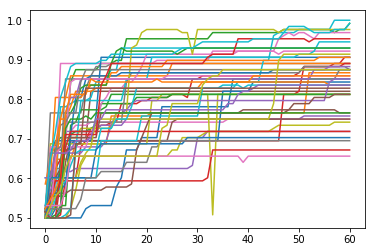

In [10]:
for i in range(10):
    plt.plot(LOD_data_2[i]['fitness'])
    plt.plot(LOD_data_3[i]['fitness'])
    plt.plot(LOD_data_4[i]['fitness'])
    plt.plot(LOD_data_5[i]['fitness'])
    plt.plot(LOD_data_6[i]['fitness'])

In [43]:
max = LOD_data_6[0]['fitness'][60]
for i in range(0,10):
    
    if max < LOD_data_6[i]['fitness'][60]:
        max = LOD_data_6[i]['fitness'][60]
max

1.0

In [12]:
x_2 = LOD_data_2[0]['update']
y_2 = [LOD_data_2[i]['fitness'] for i in range(10)]

x_3 = LOD_data_3[0]['update']
y_3 = [LOD_data_3[i]['fitness'] for i in range(10)]

x_4 = LOD_data_4[0]['update']
y_4 = [LOD_data_4[i]['fitness'] for i in range(10)]

x_5 = LOD_data_5[0]['update']
y_5 = [LOD_data_5[i]['fitness'] for i in range(10)]

x_6 = LOD_data_6[0]['update']
y_6 = [LOD_data_6[i]['fitness'] for i in range(10)]

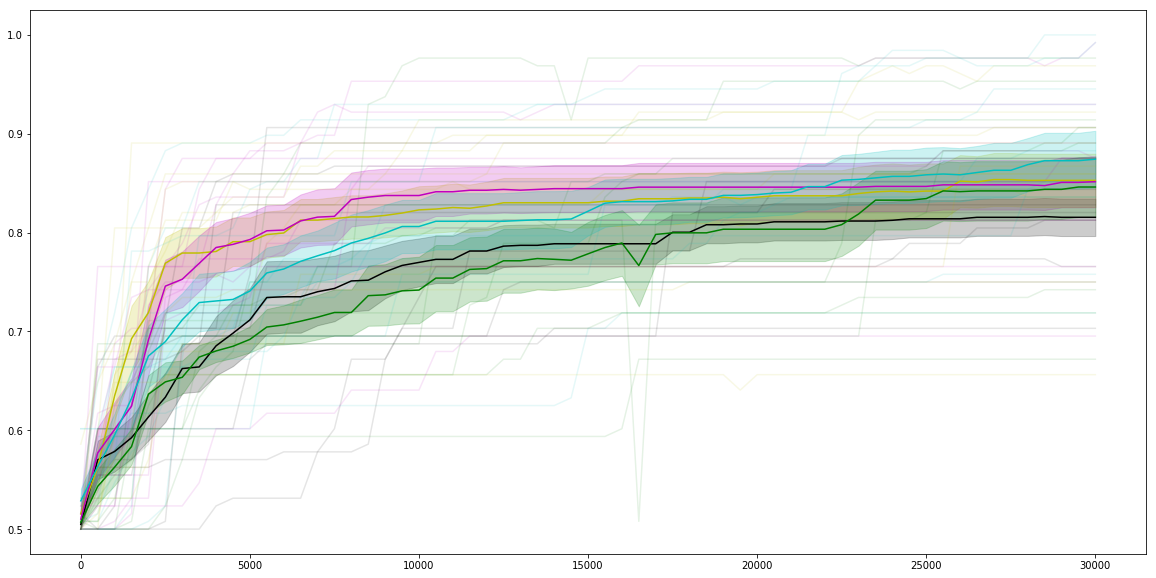

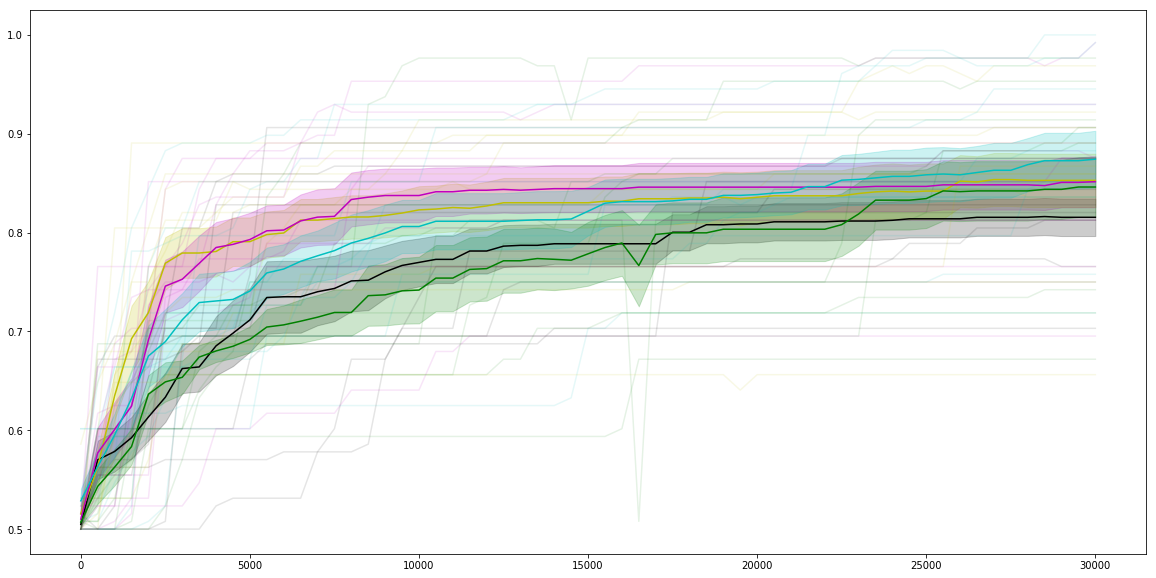

In [119]:
# Let's plot the fitness
agency.plot_5LODdata_and_Bootstrap(x_2, y_2, y_3, y_4, y_5, y_6, label=['2','3','4','5','6'])

# agency.plot_LODdata_and_Bootstrap(x_2, y_2, label=['2_fitness'])
# agency.plot_LODdata_and_Bootstrap(x_3, y_3, label=['3_fitness'])
# agency.plot_LODdata_and_Bootstrap(x_4, y_4, label=['4_fitness'])
# agency.plot_LODdata_and_Bootstrap(x_5, y_5, label=['5_fitness'])
# agency.plot_LODdata_and_Bootstrap(x_6, y_6, label=['6_fitness'])

In [44]:
# inspect the fitness of a specific LOD (run)
heading = 'fitness'
LOD_data_2[run][heading][:]

0     0.500000
1     0.554688
2     0.554688
3     0.554688
4     0.640625
5     0.703125
6     0.703125
7     0.703125
8     0.703125
9     0.820312
10    0.820312
11    0.820312
12    0.820312
13    0.820312
14    0.820312
15    0.820312
16    0.820312
17    0.820312
18    0.820312
19    0.820312
20    0.820312
21    0.820312
22    0.820312
23    0.820312
24    0.820312
25    0.820312
26    0.820312
27    0.820312
28    0.820312
29    0.820312
        ...   
31    0.820312
32    0.820312
33    0.820312
34    0.820312
35    0.820312
36    0.820312
37    0.820312
38    0.820312
39    0.820312
40    0.820312
41    0.820312
42    0.820312
43    0.820312
44    0.820312
45    0.820312
46    0.820312
47    0.820312
48    0.820312
49    0.820312
50    0.820312
51    0.820312
52    0.820312
53    0.820312
54    0.820312
55    0.820312
56    0.820312
57    0.820312
58    0.820312
59    0.820312
60    0.820312
Name: fitness, Length: 61, dtype: float64

In [45]:
# and write the values to a new list
n_agents = 61
n_runs = 10
fitness_data = [[LOD_data_2[r][heading][i] for i in range(n_agents)] for r in range(n_runs)]
[print(x) for x in fitness_data]

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5234375, 0.53125, 0.53125, 0.53125, 0.53125, 0.53125, 0.578125, 0.6015625, 0.671875, 0.671875, 0.671875, 0.703125, 0.703125, 0.703125, 0.703125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.78125, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625]
[0.5, 0.5546875, 0.5546875, 0.5546875, 0.640625, 0.703125, 0.703125, 0.703125, 0.703125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8

[None, None, None, None, None, None, None, None, None, None]

## Counting Markov Brain Gates

In [94]:
add = 0
#brain2, brain3, brain4, brain5, brain6 
for i in range(0,10):
    brain2 = LOD_data_2[i]['markovBrainGates'][60]
    brain3 = LOD_data_3[i]['markovBrainGates'][60]
    brain4 = LOD_data_4[i]['markovBrainGates'][60]
    brain5 = LOD_data_5[i]['markovBrainGates'][60]
    brain6 = LOD_data_6[i]['markovBrainGates'][60]
    print(brain2, brain3, brain4, brain5, brain6)
    add = add + brain6
print(add/10)

4 4 6 8 4
2 1 4 6 11
2 3 6 6 5
2 3 2 5 6
2 4 2 2 4
4 4 3 7 6
2 3 5 3 7
2 3 5 2 5
1 5 4 4 6
2 4 3 7 8
6.2


# Now let's look at the genome data

In [46]:

# Get the genome from our output
path = os.path.join(basepath,'190822_7_15_63_31_h2') #name of experiment
with open(os.path.join(path,'190822_7156331_h2_genome.pkl'),'rb') as f:
    all_genomes_2 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h3') #name of experiment
with open(os.path.join(path,'190822_7156331_h3_genome.pkl'),'rb') as f:
    all_genomes_3 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h4') #name of experiment
with open(os.path.join(path,'190822_7156331_h4_genome.pkl'),'rb') as f:
    all_genomes_4 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h5') #name of experiment
with open(os.path.join(path,'190822_7156331_h5_genome.pkl'),'rb') as f:
    all_genomes_5 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h6') #name of experiment
with open(os.path.join(path,'190822_7156331_h6_genome.pkl'),'rb') as f:
    all_genomes_6 = pickle.load(f)


In [58]:
# we can pick the genome of one agent and parse it (make it readable for our scripts) 
run, agent = 0,60
genome_2 = agency.get_genome(all_genomes_2, run, agent)
genome_3 = agency.get_genome(all_genomes_3, run, agent)
genome_4 = agency.get_genome(all_genomes_4, run, agent)
genome_5 = agency.get_genome(all_genomes_5, run, agent)
genome_6 = agency.get_genome(all_genomes_6, run, agent)

# from the genome we can reconstruct the TPM (transition probability matrix) and CM (connectivity matrix)
TPM_2, TPM_gates_2, cm_2 = genome2TPM(genome_2, n_nodes=6, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)
TPM_3, TPM_gates_3, cm_3 = genome2TPM(genome_3, n_nodes=7, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)
TPM_4, TPM_gates_4, cm_4 = genome2TPM(genome_4, n_nodes=8, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)
TPM_5, TPM_gates_5, cm_5 = genome2TPM(genome_5, n_nodes=9, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)
TPM_6, TPM_gates_6, cm_6 = genome2TPM(genome_6, n_nodes=10, n_sensors=2, n_motors=2, gate_type='deterministic',states_convention='loli',remove_sensor_motor_effects=True)

In [59]:
# then we can inspect the TPM
[print(x) for x in TPM_2] 

[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  0.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  1.  0.  1. ]
[0.5 0.5 1.  1.  0.  0. ]
[0.5 0.5 1.  0.  0.  1. ]
[0.5 0.5 1.  0.  0.  1. ]
[0.5 0.5 1.  0.  0.  1. ]
[0.5 0.5 1.  0.  0.  1. ]
[0.5 0.5 1.  0.  0.  1. ]
[0.5 0.5 1.  0.  0.  1. ]
[0.5 0.5 1. 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [50]:
TPM_gates_2

[{'type': 'deterministic',
  'ins': array([4, 5, 0, 3]),
  'outs': array([3, 5]),
  'logic': [[0.0, 0.0],
   [1.0, 1.0],
   [0.0, 0.0],
   [1.0, 0.0],
   [0.0, 0.0],
   [1.0, 0.0],
   [0.0, 0.0],
   [0.0, 1.0],
   [0.0, 1.0],
   [0.0, 0.0],
   [1.0, 0.0],
   [0.0, 0.0],
   [1.0, 0.0],
   [1.0, 1.0],
   [0.0, 0.0],
   [0.0, 1.0]]},
 {'type': 'deterministic',
  'ins': array([3, 1, 2, 5]),
  'outs': array([1, 2, 3]),
  'logic': [[0.0, 1.0, 0.0],
   [1.0, 0.0, 1.0],
   [0.0, 1.0, 0.0],
   [0.0, 1.0, 0.0],
   [0.0, 0.0, 0.0],
   [1.0, 1.0, 0.0],
   [0.0, 1.0, 1.0],
   [0.0, 1.0, 0.0],
   [1.0, 1.0, 0.0],
   [0.0, 1.0, 0.0],
   [0.0, 0.0, 0.0],
   [0.0, 1.0, 0.0],
   [1.0, 1.0, 1.0],
   [1.0, 0.0, 0.0],
   [1.0, 1.0, 0.0],
   [1.0, 0.0, 0.0]]},
 {'type': 'deterministic',
  'ins': array([2, 3, 4]),
  'outs': array([1, 2]),
  'logic': [[1.0, 1.0],
   [1.0, 1.0],
   [1.0, 1.0],
   [0.0, 1.0],
   [1.0, 1.0],
   [0.0, 1.0],
   [1.0, 0.0],
   [0.0, 1.0]]},
 {'type': 'deterministic',
  'ins': array

In [65]:
# and also the connectivity matrix (CM)
print(cm_6)

[[0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Last part of the output is the activity pattern

In [98]:
# First get the data from our MABE output
path = os.path.join(basepath,'190822_7_15_63_31_h2')
with open(os.path.join(path,'190822_7156331_h2_activity.pkl'),'rb') as f:
    activity_2 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h3')
with open(os.path.join(path,'190822_7156331_h3_activity.pkl'),'rb') as f:
    activity_3 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h4')
with open(os.path.join(path,'190822_7156331_h4_activity.pkl'),'rb') as f:
    activity_4 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h5')
with open(os.path.join(path,'190822_7156331_h5_activity.pkl'),'rb') as f:
    activity_5 = pickle.load(f)
path = os.path.join(basepath,'190822_7_15_63_31_h6')
with open(os.path.join(path,'190822_7156331_h6_activity.pkl'),'rb') as f:
    activity_6 = pickle.load(f)
    

In [117]:
# reformat the activity to a single list for each trial
brain_activity_2 = []
brain_activity_3 = []
brain_activity_4 = []
brain_activity_5 = []
brain_activity_6 = []

for r in range(n_runs):
    brain_activity_2.append(agency.getBrainActivity(activity_2[r], n_nodes=6, n_hidden=2))
    #brain_activity_3.append(agency.getBrainActivity(activity_3[r], 7))
    brain_activity_4.append(agency.getBrainActivity(activity_4[r], 8))
    #brain_activity_5.append(agency.getBrainActivity(activity_5[r], 9))
    #brain_activity_6.append(agency.getBrainActivity(activity_6[r], 10))
brain_activity_4

Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...
Creating activity matrix from MABE output...


[array([[[[1., 1., 0., ..., 0., 0., 0.],
          [1., 0., 1., ..., 0., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.],
          ...,
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.]],
 
         [[1., 0., 0., ..., 0., 0., 0.],
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.],
          ...,
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.]],
 
         [[1., 0., 0., ..., 0., 0., 0.],
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.],
          ...,
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.]],
 
         ...,
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 1., ..., 1., 0., 1.],
          [0., 0., 1., ..., 1., 0., 1.],
          ...,
          [1., 1., 1., ..., 0., 0., 1.],
          [1.

In [110]:
# inspect activity for a given run, agent, and trial
run = 0
agent = 2
trial = 2
print(brain_activity_4[run][agent][trial])

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 1.]]


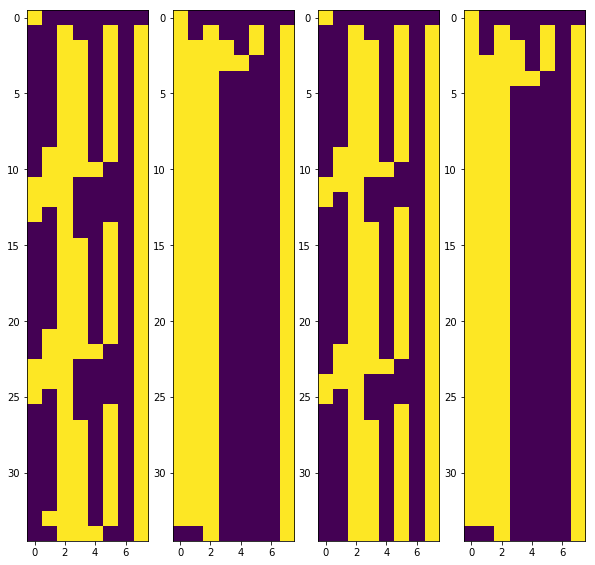

In [113]:
run, agent, wait = 0,1,4
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(brain_activity_4[run][agent][0+wait])
plt.subplot(1,4,2)
plt.imshow(brain_activity_4[run][agent][16+wait])
plt.subplot(1,4,3)
plt.imshow(brain_activity_4[run][agent][32+wait])
plt.subplot(1,4,4)
plt.imshow(brain_activity_4[run][agent][48+wait])

# The next step is doing some actual causation analysis

In [114]:
# let's analyse the actual causes of the motor occurences for the animat in one trial
run, agent, trial, occ = 0, 20, 52, 15

# First we can inspect the occurrences
X,Y = agency.get_occurrences(np.array(brain_activity[run][agent]),numSensors=2,numHidden=4,numMotors=2)
print('transition from {} to {}'.format(X[trial][occ],Y[trial][occ]))

NameError: name 'brain_activity' is not defined

In [ ]:
# to actually do the AC analysis we must first define a network for pyphi
network = pyphi.network.Network(np.array(TPM), cm=np.array(cm), 
            node_labels=('S1','S2','M1','M2','H1','H2','H3','H4'), purview_cache=None)


In [ ]:
print(network)

In [ ]:
ba = np.array()

In [ ]:
# now we can run a script for calculating the direct causes of all motor occurrences
purview, alpha, motorstate, transitions, account = agency.AnalyzeTransitions(
            network, brain_activity[run][agent][trial], 
            cause_indices=[0,1,4,5,6,7], effect_indices=[2,3],
            sensor_indices=[0,1], motor_indices=[2,3])


In [ ]:
motorstate

In [ ]:
(brain_activity[run][agent][trial]).shape

In [ ]:
# Now we can inspect the causal account and other output of AC analysis for all unique transitions in the trial!
t = 3
print('transition from {} to {}'.format(transitions[t][0],transitions[t][1]))
print('state of the motors was:')
print(motorstate[t])
print('the indices for the elements in the cause of the higher order occurrence was: ')
print(purview[t])
print('the irreducibility of the higher order cause was:')
print(alpha[t])
print(account[t])


In [ ]:
print(account)

In [ ]:
len(account)